In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
data_path= "/content/drive/MyDrive/SCF Dataset/SCFP2019.csv"

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare

In [4]:
df = pd.read_csv(data_path)
print("df shape:", df.shape)
df.head()

df shape: (28885, 351)


,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
0,1,11,6119.779308,2,75,6,12,4,2,0,...,5,3,6,3,2,10,6,6,3,3
1,1,12,4712.374912,2,75,6,12,4,2,0,...,5,3,6,3,1,10,5,5,2,2
2,1,13,5145.224455,2,75,6,12,4,2,0,...,5,3,6,3,1,10,5,5,2,2
3,1,14,5297.663412,2,75,6,12,4,2,0,...,5,2,6,2,1,10,4,4,2,2
4,1,15,4761.812371,2,75,6,12,4,2,0,...,5,3,6,3,1,10,5,5,2,2


#### A lot of rows and columns!

I will focus on households that have "been turned down for credit or feared being denied credit in the past 5 years." These households are identified in the **TURNFEAR** column.

In [5]:
df["TURNFEAR"].head(10)

0    0
1    0
2    0
3    0
4    0
5    1
6    1
7    1
8    1
9    1
Name: TURNFEAR, dtype: int64

In [6]:
mask = df["TURNFEAR"]==1
df_fear = df[mask]
print("df_fear shape:", df_fear.shape)
df_fear.head()

df_fear shape: (4623, 351)


,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
5,2,21,3790.476607,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2
6,2,22,3798.868505,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,3,2,2
7,2,23,3799.468393,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2
8,2,24,3788.076005,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2
9,2,25,3793.066589,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2


# Explore

### Age

In [7]:
age_groups = df_fear["AGECL"].unique()
print("Age Groups:", age_groups)

Age Groups: [3 5 1 2 4 6]


Categorical data
1(<35), 2(35-44), 3(45-54), 4(55-64), 5(65-74) and 6(>74)

In [8]:
agecl_dict = {
    1: "Under 35",
    2: "35-44",
    3: "45-54",
    4: "55-64",
    5: "65-74",
    6: "75 or Older",
}
age_cl =df_fear['AGECL'].replace(agecl_dict)
age_cl.head(10)

5      45-54
6      45-54
7      45-54
8      45-54
9      45-54
110    65-74
111    65-74
112    65-74
113    65-74
114    65-74
Name: AGECL, dtype: object

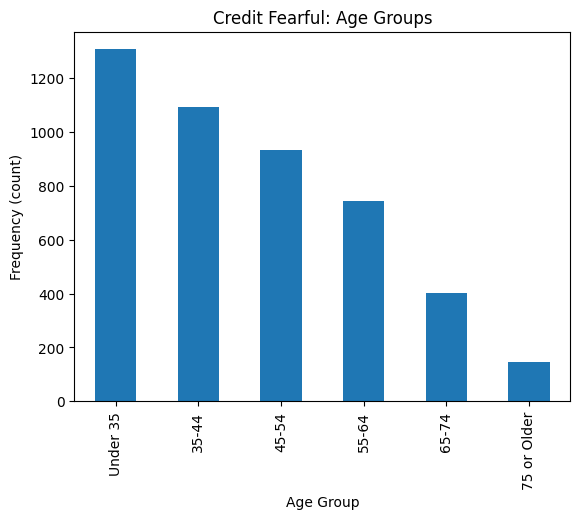

In [9]:
age_cl_value_counts = age_cl.value_counts()
age_cl_value_counts.plot(kind='bar',xlabel="Age Group",ylabel="Frequency (count)",title="Credit Fearful: Age Groups");

In [10]:
df_fear['AGE'].nunique()

67

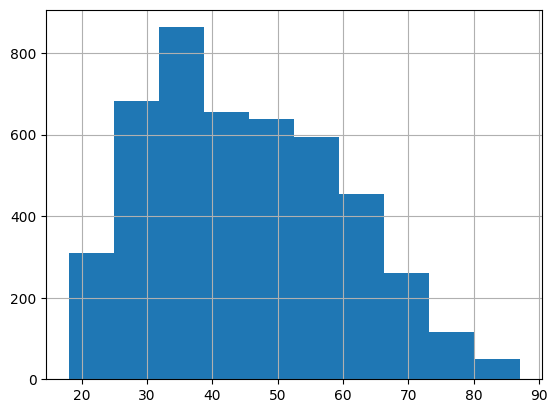

In [11]:
# Plot histogram of "AGE"
df_fear['AGE'].hist(bins=10);

### Race

In [12]:
 df_fear['RACE'].unique()

array([1, 3, 2, 5])

1 = white non-Hispanic

2 = black / African American

3 = Hispanic

5 = Other

White/Non-Hispanic        0.539477
Black/African-American    0.237508
Hispanic                  0.162232
Other                     0.060783
Name: RACE, dtype: float64


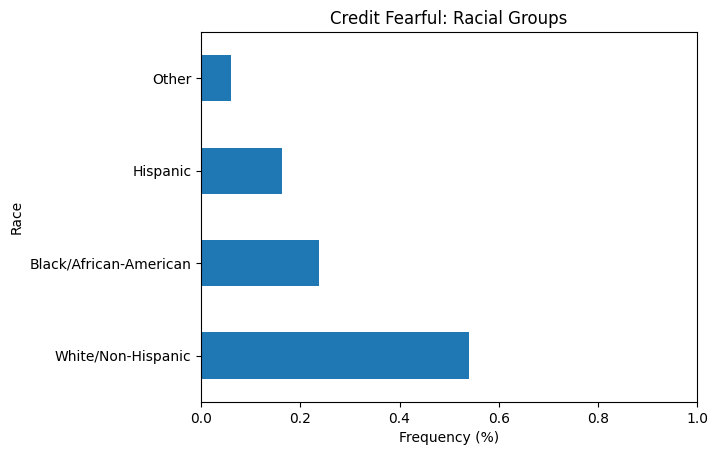

In [13]:
race_dict = {
    1: "White/Non-Hispanic",
    2: "Black/African-American",
    3: "Hispanic",
    5: "Other",
}
race = df_fear['RACE'].replace(race_dict)
race_value_counts = race.value_counts(normalize=True)
print(race_value_counts)
# Create bar chart of race_value_counts
race_value_counts.plot(kind='barh')
plt.xlim((0, 1))
plt.xlabel("Frequency (%)")
plt.ylabel("Race")
plt.title("Credit Fearful: Racial Groups");

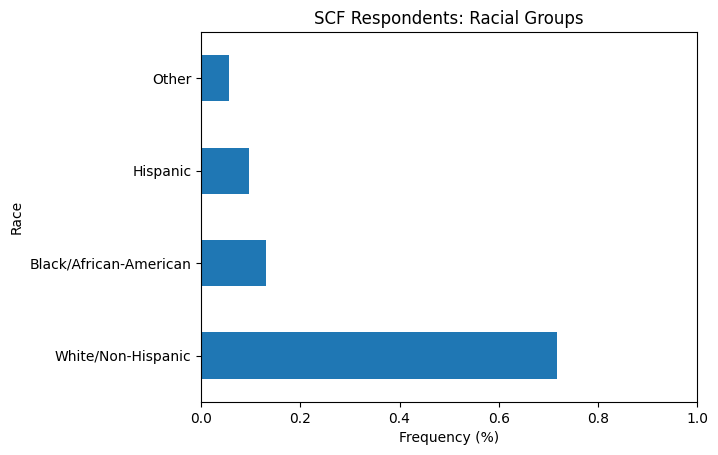

In [14]:
# Try the entire dataset
race =df['RACE'].replace(race_dict)
race_value_counts = race.value_counts(normalize=True)
# Create bar chart of race_value_counts
race_value_counts.plot(kind='barh')
plt.xlim((0, 1))
plt.xlabel("Frequency (%)")
plt.ylabel("Race")
plt.title("SCF Respondents: Racial Groups");

### Income

In [15]:
df_fear["INCCAT"].unique()

array([2, 1, 3, 6, 4, 5])

1 = 0-20

2 = 21-39.9

3 = 40-59.9

4 = 60-79.9

5 = 80-89.9

6 = 90-100

In [16]:
inccat_dict = {
    1: "0-20",
    2: "21-39.9",
    3: "40-59.9",
    4: "60-79.9",
    5: "80-89.9",
    6: "90-100",
}

df_inccat = (
      df['INCCAT'].replace(inccat_dict)
      .groupby(df['TURNFEAR'])
      .value_counts(normalize=True)
      .rename('frequency')
      .to_frame()
      .reset_index()
)

df_inccat.head(10)

,TURNFEAR,INCCAT,frequency
0,0,90-100,0.297296
1,0,60-79.9,0.174841
2,0,40-59.9,0.143146
3,0,0-20,0.140343
4,0,21-39.9,0.135933
5,0,80-89.9,0.108441
6,1,0-20,0.288125
7,1,21-39.9,0.256327
8,1,40-59.9,0.228856
9,1,60-79.9,0.132598


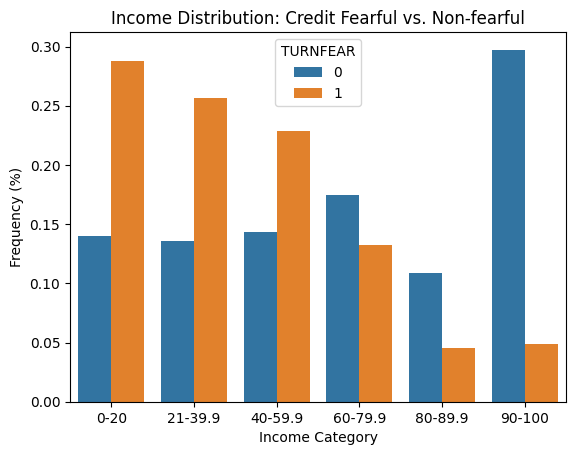

In [17]:
# Create bar chart of `df_inccat`
sns.barplot(data=df_inccat,x="INCCAT",y="frequency",order=inccat_dict.values(),hue="TURNFEAR")
plt.xlabel("Income Category")
plt.ylabel("Frequency (%)")
plt.title("Income Distribution: Credit Fearful vs. Non-fearful");

Based on all this->  Among the people who responded that they were indeed worried about being approved for credit after having been denied in the past five years, a plurality of the young and low-income had the highest number of respondents.

### Assets

In [18]:
#The entire data
asset_house_corr = df["ASSET"].corr(df["HOUSES"])
print("SCF: Asset Houses Correlation:", asset_house_corr)

SCF: Asset Houses Correlation: 0.5198273544779252


In [19]:
#our subset
asset_house_corr = df_fear["ASSET"].corr(df_fear["HOUSES"])
print("Credit Fearful: Asset Houses Correlation:", asset_house_corr)

Credit Fearful: Asset Houses Correlation: 0.583287973597916


In [20]:
cols = ["ASSET", "HOUSES", "INCOME", "DEBT", "EDUC"]
corr =df[cols].corr()
corr.style.background_gradient(axis=None)

,ASSET,HOUSES,INCOME,DEBT,EDUC
ASSET,1.000000,0.519827,0.622429,0.261250,0.116673
HOUSES,0.519827,1.000000,0.247852,0.266661,0.169300
INCOME,0.622429,0.247852,1.000000,0.114646,0.069400
DEBT,0.261250,0.266661,0.114646,1.000000,0.054179
EDUC,0.116673,0.169300,0.069400,0.054179,1.000000


In [21]:
corr = df_fear[cols].corr()
corr.style.background_gradient(axis=None)

,ASSET,HOUSES,INCOME,DEBT,EDUC
ASSET,1.000000,0.583288,0.722074,0.474658,0.113536
HOUSES,0.583288,1.000000,0.264099,0.962629,0.160348
INCOME,0.722074,0.264099,1.000000,0.172393,0.133170
DEBT,0.474658,0.962629,0.172393,1.000000,0.177386
EDUC,0.113536,0.160348,0.133170,0.177386,1.000000


The correlation between Debt & Houses int our subset!

### Education

In [22]:
df_fear['EDUC'].unique()

array([ 8, 11,  9,  2, 12,  7,  3,  6, 10, 14,  4,  1, 13,  5, -1])

In [23]:
df_educ = (df['EDUC'].groupby(df['TURNFEAR'])
            .value_counts(normalize=True)
            .rename("frequency")
            .to_frame()
            .reset_index())
df_educ.head()

,TURNFEAR,EDUC,frequency
0,0,12,0.257481
1,0,8,0.192029
2,0,13,0.149823
3,0,9,0.129833
4,0,14,0.096117


12-> BACHELOR'S DEGREE (FOR EXAMPLE: BA, AB, BS)

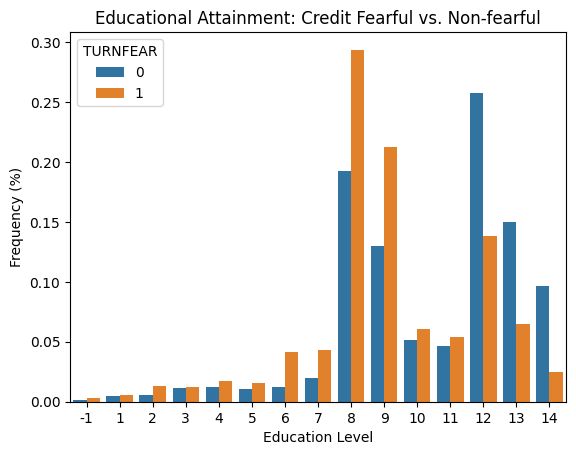

In [24]:
# Create bar chart of `df_educ`
sns.barplot(data=df_educ,x="EDUC",y="frequency",hue="TURNFEAR")
plt.xlabel("Education Level")
plt.ylabel("Frequency (%)")
plt.title("Educational Attainment: Credit Fearful vs. Non-fearful");

8-> HIGH SCHOOL GRADUATE - HIGH SCHOOL DIPLOMA OR EQUIVALENT

### Debt

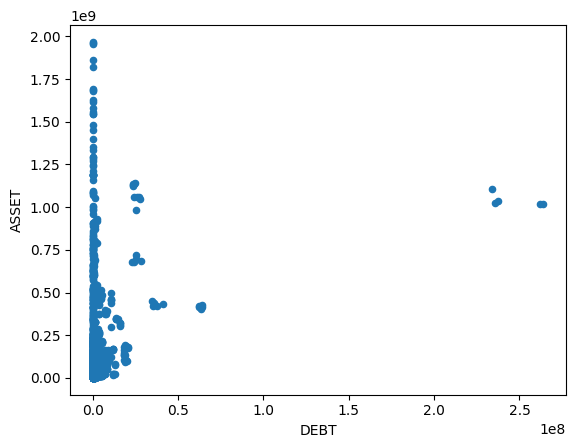

In [25]:
# Create scatter plot of ASSET vs DEBT, df
df.plot.scatter(x="DEBT",y="ASSET");

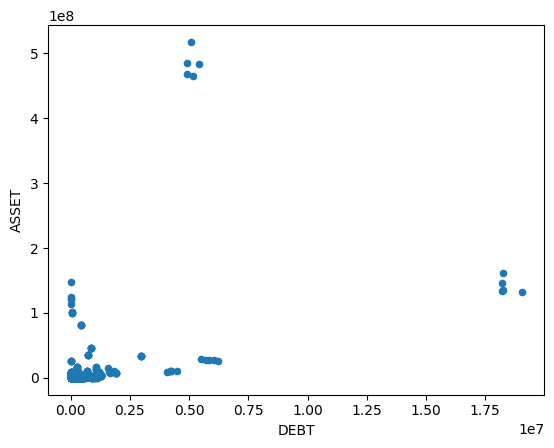

In [26]:
# Create scatter plot of ASSET vs DEBT, df_fear
df_fear.plot.scatter(x="DEBT",y="ASSET");

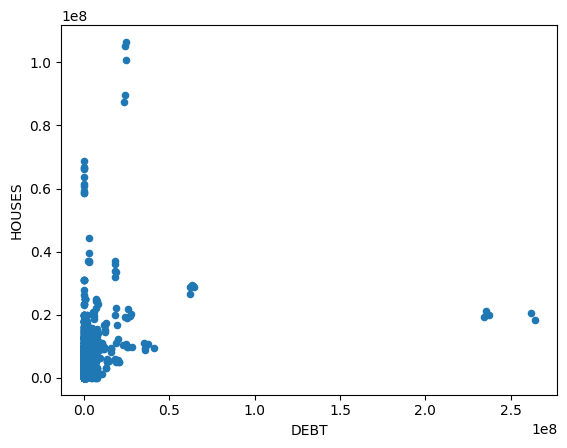

In [27]:
# Create scatter plot of HOUSES vs DEBT, df
df.plot.scatter(x="DEBT",y="HOUSES");

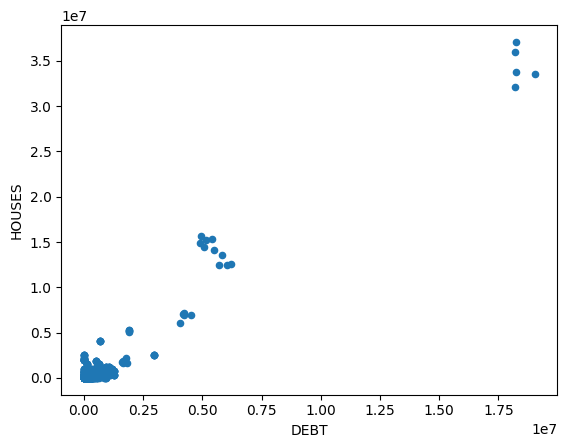

In [28]:
# Create scatter plot of HOUSES vs DEBT, df_fear
df_fear.plot.scatter(x="DEBT",y="HOUSES");

1- The outliers make it a little difficult to see the difference between these two plots, but the relationship is clear enough: our df_fear graph shows an almost perfect linear relationship unlike df.

2- Datapoints on the df_fear graph form several little groups(clusters).

# Clustering with Two features

In [29]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [31]:
X = df_fear[["DEBT","HOUSES"]]
print(X.shape)
X.head()

(4623, 2)


,DEBT,HOUSES
5,12200.0,0.0
6,12600.0,0.0
7,15300.0,0.0
8,14100.0,0.0
9,15400.0,0.0


In [32]:
# Build model
model =KMeans(n_clusters=3,random_state=42)
# Fit model to data
model.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [33]:
labels = model.labels_
labels[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

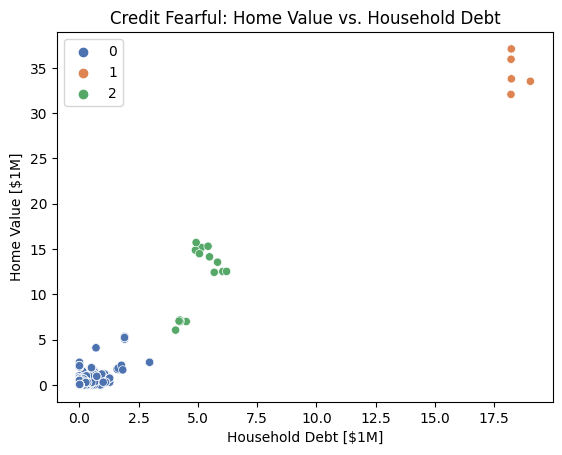

In [35]:
# Plot "HOUSES" vs "DEBT" with hue=label
sns.scatterplot(x=df_fear['DEBT']/1e6,y=df_fear['HOUSES']/1e6,hue=labels,palette="deep")
plt.xlabel("Household Debt [$1M]")
plt.ylabel("Home Value [$1M]")
plt.title("Credit Fearful: Home Value vs. Household Debt");

In [36]:
centroids = model.cluster_centers_
centroids

array([[   91017.57766674,   116150.29328698],
       [18384100.        , 34484000.        ],
       [ 5065800.        , 11666666.66666667]])

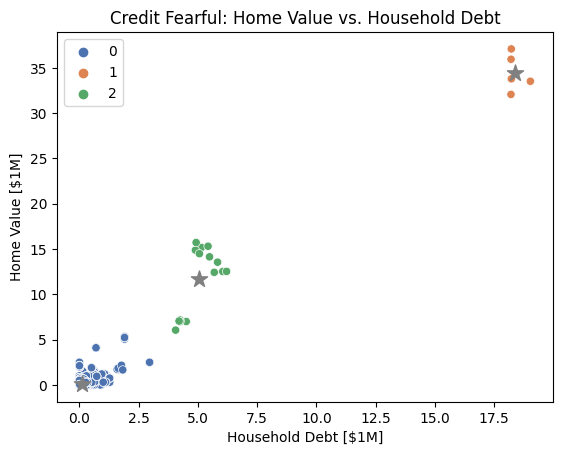

In [37]:
# Plot "HOUSES" vs "DEBT", add centroids
sns.scatterplot(x=df_fear['DEBT']/1e6,y=df_fear['HOUSES']/1e6,hue=labels,palette="deep")
plt.scatter(
    x=centroids[:,0]/1e6,
    y=centroids[:,1]/1e6,
    color='gray',
    marker='*',
    s=150
)
plt.xlabel("Household Debt [$1M]")
plt.ylabel("Home Value [$1M]")
plt.title("Credit Fearful: Home Value vs. Household Debt");

In [38]:
inertia = model.inertia_
print("Inertia (3 clusters):", inertia)

Inertia (3 clusters): 939554010797057.5


In [41]:
ss = silhouette_score(X,model.labels_)   # -1: is the worst & 1 : is the best
print("Silhouette Score (3 clusters):", ss)

Silhouette Score (3 clusters): 0.9768842462944348


In [42]:
# number of clusters hyperparameter tunning
n_clusters = range(2,13)
inertia_errors = list()
silhouette_scores = list()

# Add `for` loop to train model and calculate inertia, silhouette score.
for x in n_clusters:
    model=KMeans(n_clusters=x,random_state=42)
    model.fit(X)
    inertia_errors.append(model.inertia_)
    silhouette_scores.append(silhouette_score(X,model.labels_))
print("Inertia:", inertia_errors)
print()
print("Silhouette Scores:", silhouette_scores)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Inertia: [3018038313336920.0, 939554010797057.5, 546098841715650.0, 309310386410919.8, 235243397481786.56, 182225729179700.12, 150670779013794.06, 114321995931019.72, 100340259483917.66, 86229997033602.6, 74757234072099.45]

Silhouette Scores: [0.9855099957519555, 0.9768842462944348, 0.9490311483406091, 0.839330043242819, 0.7287406719898627, 0.726989114305748, 0.7263840026889208, 0.7335125606476427, 0.692157992955073, 0.6949309528556856, 0.6951831031001252]


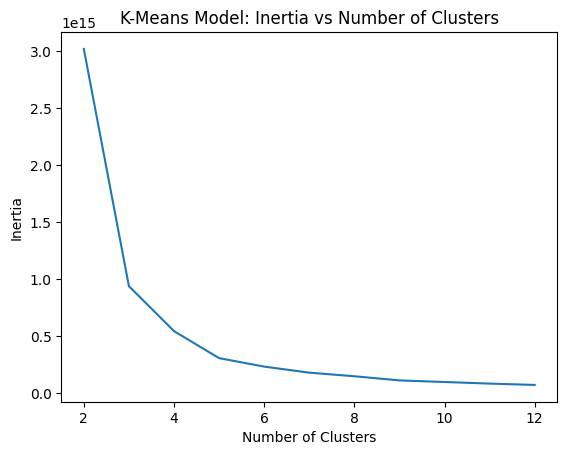

In [43]:
# Plot `inertia_errors` by `n_clusters`
plt.plot(n_clusters,inertia_errors)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("K-Means Model: Inertia vs Number of Clusters");

In [45]:
# from the plot we must choose 4 or 5 clusters (pick the point where the drop in inertia becomes less dramatic and the line begins to flatten out.)

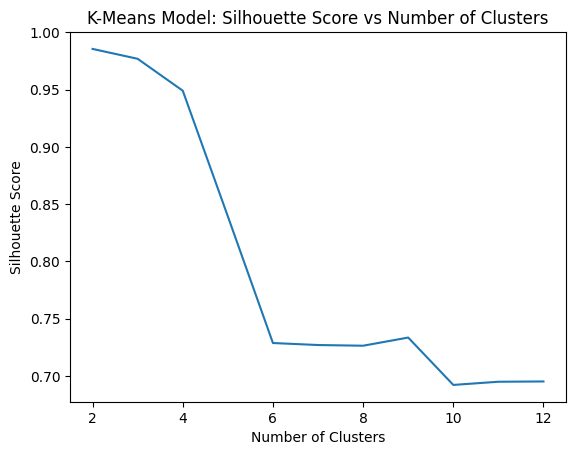

In [46]:
# Plot `silhouette_scores` vs `n_clusters`
plt.plot(n_clusters,silhouette_scores)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("K-Means Model: Silhouette Score vs Number of Clusters");

In [48]:
# so we must choose 4 clusters.

In [50]:
# Let's build the final Model
final_model = KMeans(n_clusters=4,random_state=42)
# Fit model to data
final_model.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

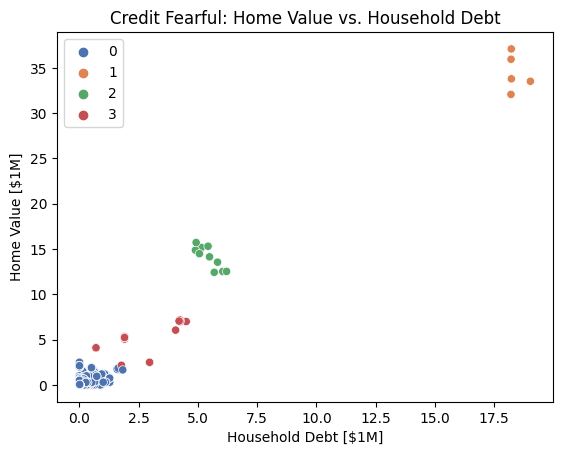

In [51]:
# Plot "HOUSES" vs "DEBT" with final_model labels
sns.scatterplot(x=df_fear["DEBT"]/1e6,y=df_fear["HOUSES"]/1e6,hue=final_model.labels_,palette="deep")
plt.xlabel("Household Debt [$1M]")
plt.ylabel("Home Value [$1M]")
plt.title("Credit Fearful: Home Value vs. Household Debt");

In [52]:
# Create dataframe contains the mean "DEBT" and "HOUSES" values for each of the clusters in your final_model.
xgb =X.groupby(final_model.labels_).mean()
xgb

,DEBT,HOUSES
0,8.488629e+04,1.031872e+05
1,1.838410e+07,3.448400e+07
2,5.472800e+06,1.407400e+07
3,2.420929e+06,4.551429e+06


In [53]:
final_model.cluster_centers_

array([[   84886.28951384,   103187.22476564],
       [18384100.        , 34484000.        ],
       [ 5472800.        , 14074000.        ],
       [ 2420928.57142857,  4551428.57142857]])

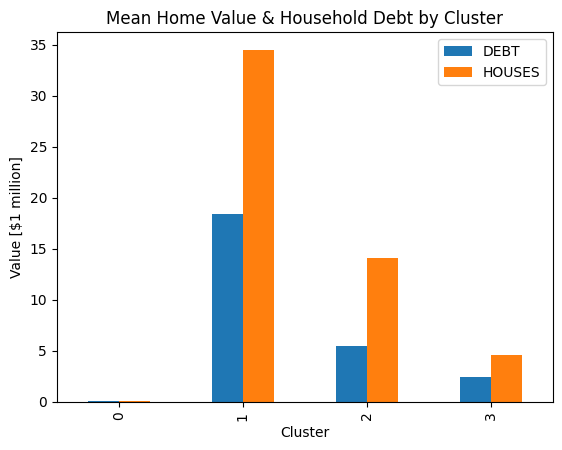

In [54]:
# Create side-by-side bar chart of `xgb`
(xgb/1e6).plot(kind='bar')
plt.xlabel("Cluster")
plt.ylabel("Value [$1 million]")
plt.title("Mean Home Value & Household Debt by Cluster");

# Clustering with Multiple Features

In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

In [57]:
df=df[(df['TURNFEAR']==1) & (df['NETWORTH']<2e6)]

In [59]:
df.head()

,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
5,2,21,3790.476607,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2
6,2,22,3798.868505,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,3,2,2
7,2,23,3799.468393,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2
8,2,24,3788.076005,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2
9,2,25,3793.066589,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2


In [60]:
# Calculate variance, get 10 largest features
top_ten_var =df.var().sort_values().tail(10)
top_ten_var

PLOAN1      1.140894e+10
ACTBUS      1.251892e+10
BUS         1.256643e+10
KGTOTAL     1.346475e+10
DEBT        1.848252e+10
NHNFIN      2.254163e+10
HOUSES      2.388459e+10
NETWORTH    4.847029e+10
NFIN        5.713939e+10
ASSET       8.303967e+10
dtype: float64

In [62]:
# Create horizontal bar chart of `top_ten_var`
import plotly.express as px
fig = px.bar(x=top_ten_var, y=top_ten_var.index,title="SCF: High Variance Features")
fig.update_layout(xaxis_title="Variance",yaxis_title="Feature")
fig.show()

In [63]:
# Create a boxplot of `NHNFIN`
fig = px.box(data_frame=df,x="NHNFIN",title="Distribution of Non-home, Non-Financial Assets")
fig.update_layout(xaxis_title="Value [$]")
fig.show()

In [65]:
# The dataset is massively right-skewed because of the huge outliers on the right side of the distribution.
# The best way to deal with this is to look at the trimmed variance, where we remove extreme values before
# calculating variance. We can do this using the trimmed_variance function from the SciPy library.

In [67]:
from scipy.stats.mstats import trimmed_var
#trimmed_var?
trimmed_var(df['DEBT'])   # default limits=(0.1,0.1)

3089864647.655702

In [68]:
df.apply(trimmed_var,limits=(0.1,0.1)).sort_values()

HOTHMA      0.000000e+00
NOTXBND     0.000000e+00
MORTBND     0.000000e+00
GOVTBND     0.000000e+00
OBND        0.000000e+00
                ...     
DEBT        3.089865e+09
NETWORTH    3.099929e+09
HOUSES      4.978660e+09
NFIN        8.456442e+09
ASSET       1.175370e+10
Length: 351, dtype: float64

In [69]:
# Calculate trimmed variance
top_ten_trim_var = df.apply(trimmed_var).sort_values().tail(10)
top_ten_trim_var

WAGEINC     5.550737e+08
HOMEEQ      7.338377e+08
NH_MORT     1.333125e+09
MRTHEL      1.380468e+09
PLOAN1      1.441968e+09
DEBT        3.089865e+09
NETWORTH    3.099929e+09
HOUSES      4.978660e+09
NFIN        8.456442e+09
ASSET       1.175370e+10
dtype: float64

In [70]:
# Create horizontal bar chart of `top_ten_trim_var`
fig = px.bar(x=top_ten_trim_var,y=top_ten_trim_var.index,title="SCF: High Variance Features")
fig.update_layout(xaxis_title="Trimmed Variance",yaxis_title="Feature")
fig.show()

In [71]:
high_var_cols = top_ten_trim_var.tail(5).index.to_list()
high_var_cols

['DEBT', 'NETWORTH', 'HOUSES', 'NFIN', 'ASSET']

In [72]:
X = df[high_var_cols]
print("X shape:", X.shape)
X.head()

X shape: (4418, 5)


,DEBT,NETWORTH,HOUSES,NFIN,ASSET
5,12200.0,-6710.0,0.0,3900.0,5490.0
6,12600.0,-4710.0,0.0,6300.0,7890.0
7,15300.0,-8115.0,0.0,5600.0,7185.0
8,14100.0,-2510.0,0.0,10000.0,11590.0
9,15400.0,-5715.0,0.0,8100.0,9685.0


In [73]:
# Instantiate transformer
ss = StandardScaler()

# Transform `X`
X_scaled_data = ss.fit_transform(X)

# Put `X_scaled_data` into DataFrame
X_scaled = pd.DataFrame(X_scaled_data,columns=X.columns)

print("X_scaled shape:", X_scaled.shape)
X_scaled.head()

X_scaled shape: (4418, 5)


,DEBT,NETWORTH,HOUSES,NFIN,ASSET
0,-0.445075,-0.377486,-0.48231,-0.474583,-0.498377
1,-0.442132,-0.368401,-0.48231,-0.464541,-0.490047
2,-0.422270,-0.383868,-0.48231,-0.467470,-0.492494
3,-0.431097,-0.358407,-0.48231,-0.449061,-0.477206
4,-0.421534,-0.372966,-0.48231,-0.457010,-0.483818


In [74]:
X_scaled_summary = X_scaled.aggregate(['mean','std']).astype(int)
X_scaled_summary

,DEBT,NETWORTH,HOUSES,NFIN,ASSET
mean,0,0,0,0,0
std,1,1,1,1,1


In [75]:
n_clusters = range(2,13)
inertia_errors = []
silhouette_scores = []

# Add `for` loop to train model and calculate inertia, silhouette score.
for k in n_clusters:
    model=make_pipeline(
        StandardScaler(),
        KMeans(n_clusters=k,random_state=42)
    )
    model.fit(X_scaled)
    inertia_errors.append(model.named_steps['kmeans'].inertia_)
    silhouette_scores.append(silhouette_score(X,model.named_steps['kmeans'].labels_))
print("Inertia:", inertia_errors[:3])
print()
print("Silhouette Scores:", silhouette_scores[:3])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

Inertia: [11028.058082607175, 7190.526303575358, 5924.997726868039]

Silhouette Scores: [0.7464502937083215, 0.7044601307791996, 0.6962653079183132]


In [76]:
# Create line plot of `inertia_errors` vs `n_clusters`
fig = px.line(x=n_clusters,y=inertia_errors,title="K-Means Model: Inertia vs Number of Clusters")
fig.update_layout(xaxis_title="Number of Clusters",yaxis_title="Inertia")
fig.show()

In [77]:
# Create a line plot of `silhouette_scores` vs `n_clusters`
fig = px.line(x=n_clusters,y=silhouette_scores,title="K-Means Model: Silhouette Score vs Number of Clusters")
fig.update_layout(xaxis_title="Number of Clusters",yaxis_title="Silhouette Score")
fig.show()

In [78]:
final_model = make_pipeline(
          StandardScaler(),
        KMeans(n_clusters=4,random_state=42)
)
final_model.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=4, random_state=42))])

In [79]:
labels =final_model.named_steps['kmeans'].labels_
print(labels[:5])

[0 0 0 0 0]


In [80]:
xgb = X.groupby(labels).mean()
xgb

,DEBT,NETWORTH,HOUSES,NFIN,ASSET
0,26551.075439,13676.153182,13745.637777,2.722605e+04,4.022723e+04
1,218112.818182,174713.441558,257403.246753,3.305884e+05,3.928263e+05
2,116160.779817,965764.155963,264339.449541,7.800611e+05,1.081925e+06
3,732937.575758,760397.575758,826136.363636,1.276227e+06,1.493335e+06


In [81]:
# Create side-by-side bar chart of `xgb`
fig = px.bar(xgb,barmode='group',title="Mean Household Finances by Cluster")
fig.update_layout(xaxis_title="Cluster",yaxis_title="Value [$]")
fig.show()

In [82]:
#  If we're going to do anything like the scatter plot we made before, we'll need to take our 5-dimensional data and change it into something we can look at in 2 dimensions.

In [83]:
# Instantiate transformer
pca = PCA(n_components=2,random_state=42)
sc=StandardScaler()
# Transform `X`
X_t = pca.fit_transform(sc.fit_transform(X))

# Put `X_t` into DataFrame
X_pca = pd.DataFrame(X_t,columns=['PC1','PC2'])

print("X_pca shape:", X_pca.shape)
X_pca.head()

X_pca shape: (4418, 2)


,PC1,PC2
0,-1.020669,-0.067119
1,-1.006799,-0.073208
2,-1.008007,-0.049070
3,-0.984522,-0.075588
4,-0.993881,-0.057924


In [84]:
# Create scatter plot of `PC2` vs `PC1`
fig = px.scatter(data_frame=X_pca,x='PC1',y='PC2',color=labels.astype(str),title="PCA Representation of Clusters")
fig.update_layout(xaxis_title="PC1",yaxis_title="PC2")
fig.show()